In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('MD_agric_exam-4313.csv')

In [4]:
df

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava
...,...,...,...,...,...,...,...,...,...,...
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat
996,2531,552.80945,398.1,-5.9,33.4,4.607136,0.130178,0.8,0.449790,wheat
997,1040,678.22504,564.4,-4.6,31.7,5.567556,0.448149,1.2,0.492988,maize
998,58,792.65370,928.5,-3.3,31.2,5.102048,0.387350,1.1,0.597557,potato


In [5]:
df["Crop_type"].unique()

array(['coffee', 'potato', 'banana', 'wheat', 'cassava', 'maize', 'tea',
       'rice'], dtype=object)

In [8]:
df[df["Crop_type"] == "wheat"].max()

Field_ID                  5632
Elevation            1003.9437
Rainfall                2009.6
Min_temperature_C         -1.4
Max_temperature_C         35.7
pH                    7.482802
Pollution_level       0.930238
Plot_size                 14.9
Annual_yield          8.994376
Crop_type                wheat
dtype: object

In [13]:
df[df["Pollution_level"] > 0.2]["Rainfall"].sum()

478902.6

In [15]:
def temperature_range(field):
    fields = df[df["Field_ID"] == field]
    return fields["Max_temperature_C"] - fields["Min_temperature_C"]

for field_id in [1458, 1895, 5443]:
    print(temperature_range(field_id))
    

135    40.7
dtype: float64
644    35.7
dtype: float64
892    33.4
dtype: float64


In [18]:
data = df
a = data['Crop_type'].unique()
b = float('inf')
c = ''

for crop in a:
    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()
    if d < b:
        b = d
        c = crop

print(c)

rice


In [19]:
df[df["pH"] < 5.5]["Plot_size"].sum()

1731.8999999999999

In [22]:
df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
5,2274,270.45100,1665.2,-7.2,34.3,5.873082,0.001545,3.9,1.743458,banana
13,4807,520.29770,292.3,-6.3,32.9,5.379286,0.196589,1.4,0.881568,potato
14,973,432.03570,1464.4,-6.0,30.2,7.482802,0.019800,3.0,1.377434,wheat
...,...,...,...,...,...,...,...,...,...,...
990,1637,504.66306,1144.5,-5.7,32.1,5.666609,0.431891,4.8,2.486276,wheat
991,756,578.91270,889.4,-5.2,31.0,5.062155,0.442495,2.2,1.209928,cassava
992,1332,359.76013,1816.0,-6.4,32.9,7.350705,0.133453,2.9,1.225715,wheat
995,2202,572.95935,625.6,-5.5,31.0,5.258964,0.086330,1.2,0.750675,wheat


In [24]:
df.describe()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2779.486000,628.136035,1197.734700,-4.504100,30.89460,5.603899,2.233740e-01,3.962400,2.101536
std,1595.068372,179.098546,497.794699,1.568117,1.92225,0.802154,2.288665e-01,3.459036,1.926694
min,1.000000,35.910797,110.100000,-9.700000,25.10000,3.701838,5.397448e-10,0.500000,0.174857
25%,1442.250000,504.392825,771.575000,-5.600000,29.57500,5.018775,4.449419e-02,1.500000,0.786612
50%,2728.500000,657.468975,1194.900000,-4.400000,30.90000,5.562078,1.661962e-01,2.900000,1.478622
75%,4133.000000,761.075752,1616.900000,-3.300000,32.20000,6.201437,3.077840e-01,4.700000,2.519811
max,5632.000000,1003.943700,2408.500000,-1.200000,37.30000,7.484683,9.954134e-01,15.000000,12.695224


In [29]:
#df["Rainfall"]
np.std(df[(df['Plot_size'] > df["Plot_size"].median())]["Rainfall"])

469.6199685856172

In [56]:
df.mode()["Max_temperature_C"]

0      30.7
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
995     NaN
996     NaN
997     NaN
998     NaN
999     NaN
Name: Max_temperature_C, Length: 1000, dtype: float64

In [79]:
df.groupby('Crop_type').size()

Crop_type
banana     103
cassava    141
coffee      99
maize       82
potato     146
rice        48
tea        137
wheat      244
dtype: int64

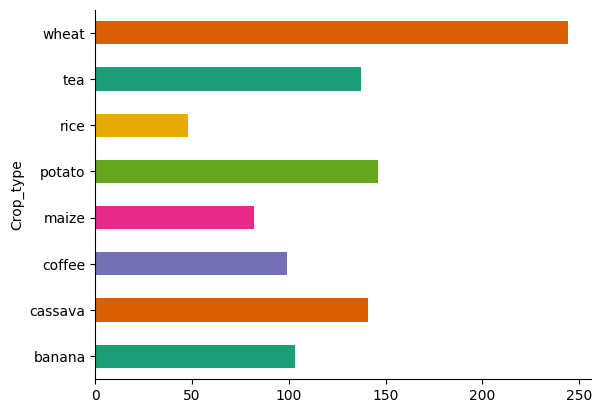

In [80]:
# @title Crop_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Crop_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [81]:
df.corr(numeric_only=True)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield
Field_ID,1.000000,0.010592,-0.002144,0.008935,-0.012077,-0.005710,0.073132,0.017024,0.006469
Elevation,0.010592,1.000000,-0.268527,0.958888,-0.633348,-0.424522,0.277520,0.005116,0.043852
Rainfall,-0.002144,-0.268527,1.000000,0.012915,0.199348,0.028025,-0.190407,0.100076,0.095577
Min_temperature_C,0.008935,0.958888,0.012915,1.000000,-0.598835,-0.431778,0.231964,0.034513,0.073219
Max_temperature_C,-0.012077,-0.633348,0.199348,-0.598835,1.000000,0.282096,-0.183352,0.018223,-0.020977
pH,-0.005710,-0.424522,0.028025,-0.431778,0.282096,1.000000,-0.113847,0.050053,0.008961
Pollution_level,0.073132,0.277520,-0.190407,0.231964,-0.183352,-0.113847,1.000000,-0.020970,-0.076525
Plot_size,0.017024,0.005116,0.100076,0.034513,0.018223,0.050053,-0.020970,1.000000,0.948398
Annual_yield,0.006469,0.043852,0.095577,0.073219,-0.020977,0.008961,-0.076525,0.948398,1.000000


In [63]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


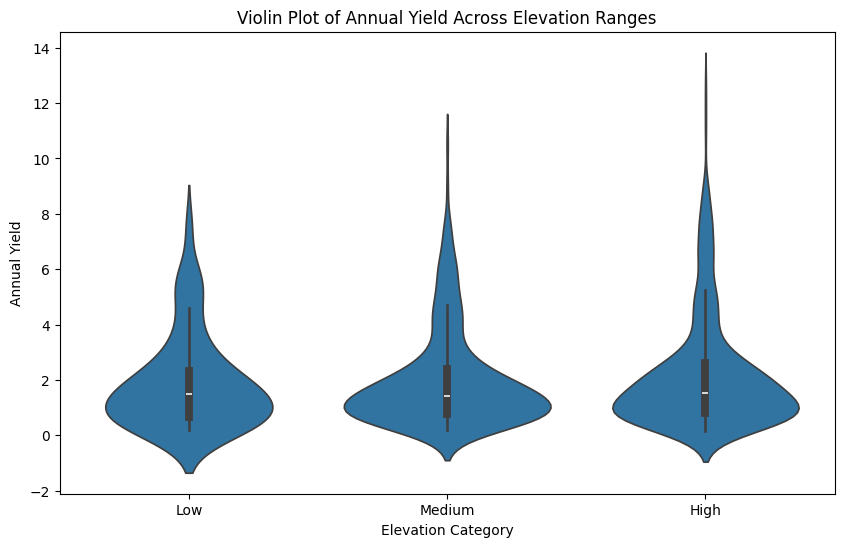

In [66]:
# Categorize the 'Elevation' into three ranges: Low, Medium, High
df['Elevation_Category'] = pd.cut(df['Elevation'],
                                  bins=[-float('inf'), 300, 600, float('inf')],
                                  labels=['Low', 'Medium', 'High'])

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=df)

# Set plot labels and title
plt.xlabel('Elevation Category')
plt.ylabel('Annual Yield')
plt.title('Violin Plot of Annual Yield Across Elevation Ranges')

# Show the plot
plt.show()

In [75]:
uniq = df["Crop_type"].unique()
crop_len =lambda crop: len(crop)
sum = 0
for crop in uniq:
    sum+=crop_len(crop)

print(sum)

42


In [78]:
#Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. 
# What is the p-value, rounded to three decimal places?
from scipy import stats

coffee = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana = df[df['Crop_type'] == 'banana']['Annual_yield']
# Example for independent samples t-test:
t_statistic, p_value = stats.ttest_ind(coffee,banana)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.5277
P-value: 0.5983


In [82]:
avg_cal = df.groupby("Crop_type")['Rainfall'].mean()
print(avg_cal)

Crop_type
banana     1714.556311
cassava    1267.440426
coffee     1503.530303
maize       697.365854
potato      642.878082
rice       1649.493750
tea        1537.594891
wheat      1035.681967
Name: Rainfall, dtype: float64


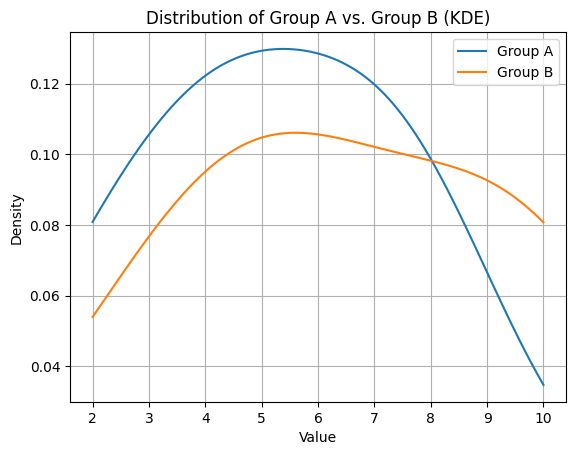

In [83]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as gkde

data = {'Group A': [2, 5, 7, 4, 8], 'Group B': [3, 6, 9, 5, 10]}
df = pd.DataFrame(data)

# Kernel density estimation for each group
kde_a = gkde(df['Group A'])
kde_b = gkde(df['Group B'])

# Generate x-axis values
x = np.linspace(df['Group A'].min(), df['Group B'].max(), 100)

# Calculate KDE values
density_a = kde_a(x)
density_b = kde_b(x)

# Plot the KDEs
plt.plot(x, density_a, label='Group A')
plt.plot(x, density_b, label='Group B')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Group A vs. Group B (KDE)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

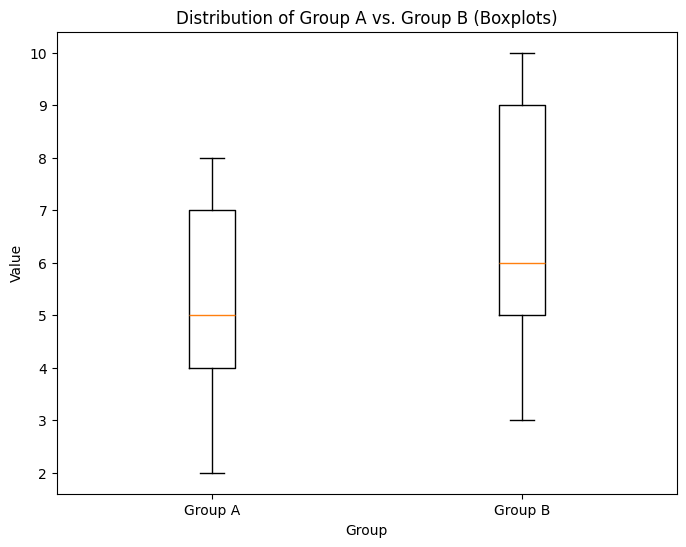

In [84]:
# Create boxplots
plt.figure(figsize=(8, 6))
plt.boxplot(df[['Group A', 'Group B']], labels=['Group A', 'Group B'])

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Distribution of Group A vs. Group B (Boxplots)')

# Show the plot
plt.show()